# Explore wavelets

Stefan/Yuzhao Heng
Since Sun. Sep. 26th, 2021

Explore usage of `pywt`, to see how wavelet decomposition into levels of coefficients works.


## Setup

In [1]:
import os
from math import isclose

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

from icecream import ic

from util import *
from ecg_data import DataGetter

os.chdir('../../PVC_DATA')

dg = DataGetter()
ecgs = dg('daePm.ecg')


## `Wavelet` objects

In [2]:
w = pywt.Wavelet('sym5')
print(w)
ic(w.dec_len, w.rec_len)
scl_fun, wvl_fun, x = w.wavefun()
ic(scl_fun.shape, wvl_fun.shape, x.shape)
assert isclose(scl_fun @ wvl_fun, 0, abs_tol=1e-9)  # Orthogonal

w = pywt.Wavelet('db5')
print(w)

Wavelet sym5
  Family name:    Symlets
  Short name:     sym
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


ic| w.dec_len: 10, w.rec_len: 10
ic| scl_fun.shape: (2305,), wvl_fun.shape: (2305,), x.shape: (2305,)


Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


## All wavelets available

In [3]:
for f in pywt.families():
    l = pywt.wavelist(f)
    ic(len(l), l[:10])


ic| len(l): 1, l[:10]: ['haar']
ic| len(l): 38
    l[:10]: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10']
ic| len(l): 19
    l[:10]: ['sym2',
             'sym3',
             'sym4',
             'sym5',
             'sym6',
             'sym7',
             'sym8',
             'sym9',
             'sym10',
             'sym11']
ic| len(l): 17
    l[:10]: ['coif1',
             'coif2',
             'coif3',
             'coif4',
             'coif5',
             'coif6',
             'coif7',
             'coif8',
             'coif9',
             'coif10']
ic| len(l): 15
    l[:10]: ['bior1.1',
             'bior1.3',
             'bior1.5',
             'bior2.2',
             'bior2.4',
             'bior2.6',
             'bior2.8',
             'bior3.1',
             'bior3.3',
             'bior3.5']
ic| len(l): 15
    l[:10]: ['rbio1.1',
             'rbio1.3',
             'rbio1.5',
             'rbio2.2',
             'rbio2.4',
             'rb

## Wavelet shapes

ic| l: 1
ic| n_col: 4, n_row: 1
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1


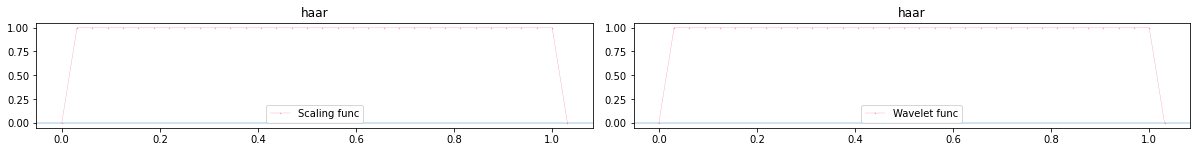

ic| l: 38
ic| n_col: 4, n_row: 19
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1
ic| r: 0, c: 1, r * n_func + c: 1, idx: 3
ic| r: 1, c: 0, r * n_func + c: 2, idx: 5
ic| r: 1, c: 1, r * n_func + c: 3, idx: 7
ic| r: 2, c: 0, r * n_func + c: 4, idx: 9
ic| r: 2, c: 1, r * n_func + c: 5, idx: 11
ic| r: 3, c: 0, r * n_func + c: 6, idx: 13
ic| r: 3, c: 1, r * n_func + c: 7, idx: 15
ic| r: 4, c: 0, r * n_func + c: 8, idx: 17
ic| r: 4, c: 1, r * n_func + c: 9, idx: 19
ic| r: 5, c: 0, r * n_func + c: 10, idx: 21
ic| r: 5, c: 1, r * n_func + c: 11, idx: 23
ic| r: 6, c: 0, r * n_func + c: 12, idx: 25
ic| r: 6, c: 1, r * n_func + c: 13, idx: 27
ic| r: 7, c: 0, r * n_func + c: 14, idx: 29
ic| r: 7, c: 1, r * n_func + c: 15, idx: 31
ic| r: 8, c: 0, r * n_func + c: 16, idx: 33
ic| r: 8, c: 1, r * n_func + c: 17, idx: 35
ic| r: 9, c: 0, r * n_func + c: 18, idx: 37
ic| r: 9, c: 1, r * n_func + c: 19, idx: 39
ic| r: 10, c: 0, r * n_func + c: 20, idx: 41
ic| r: 10, c: 1, r * n_func + c: 21, idx: 43
ic| r: 11, 

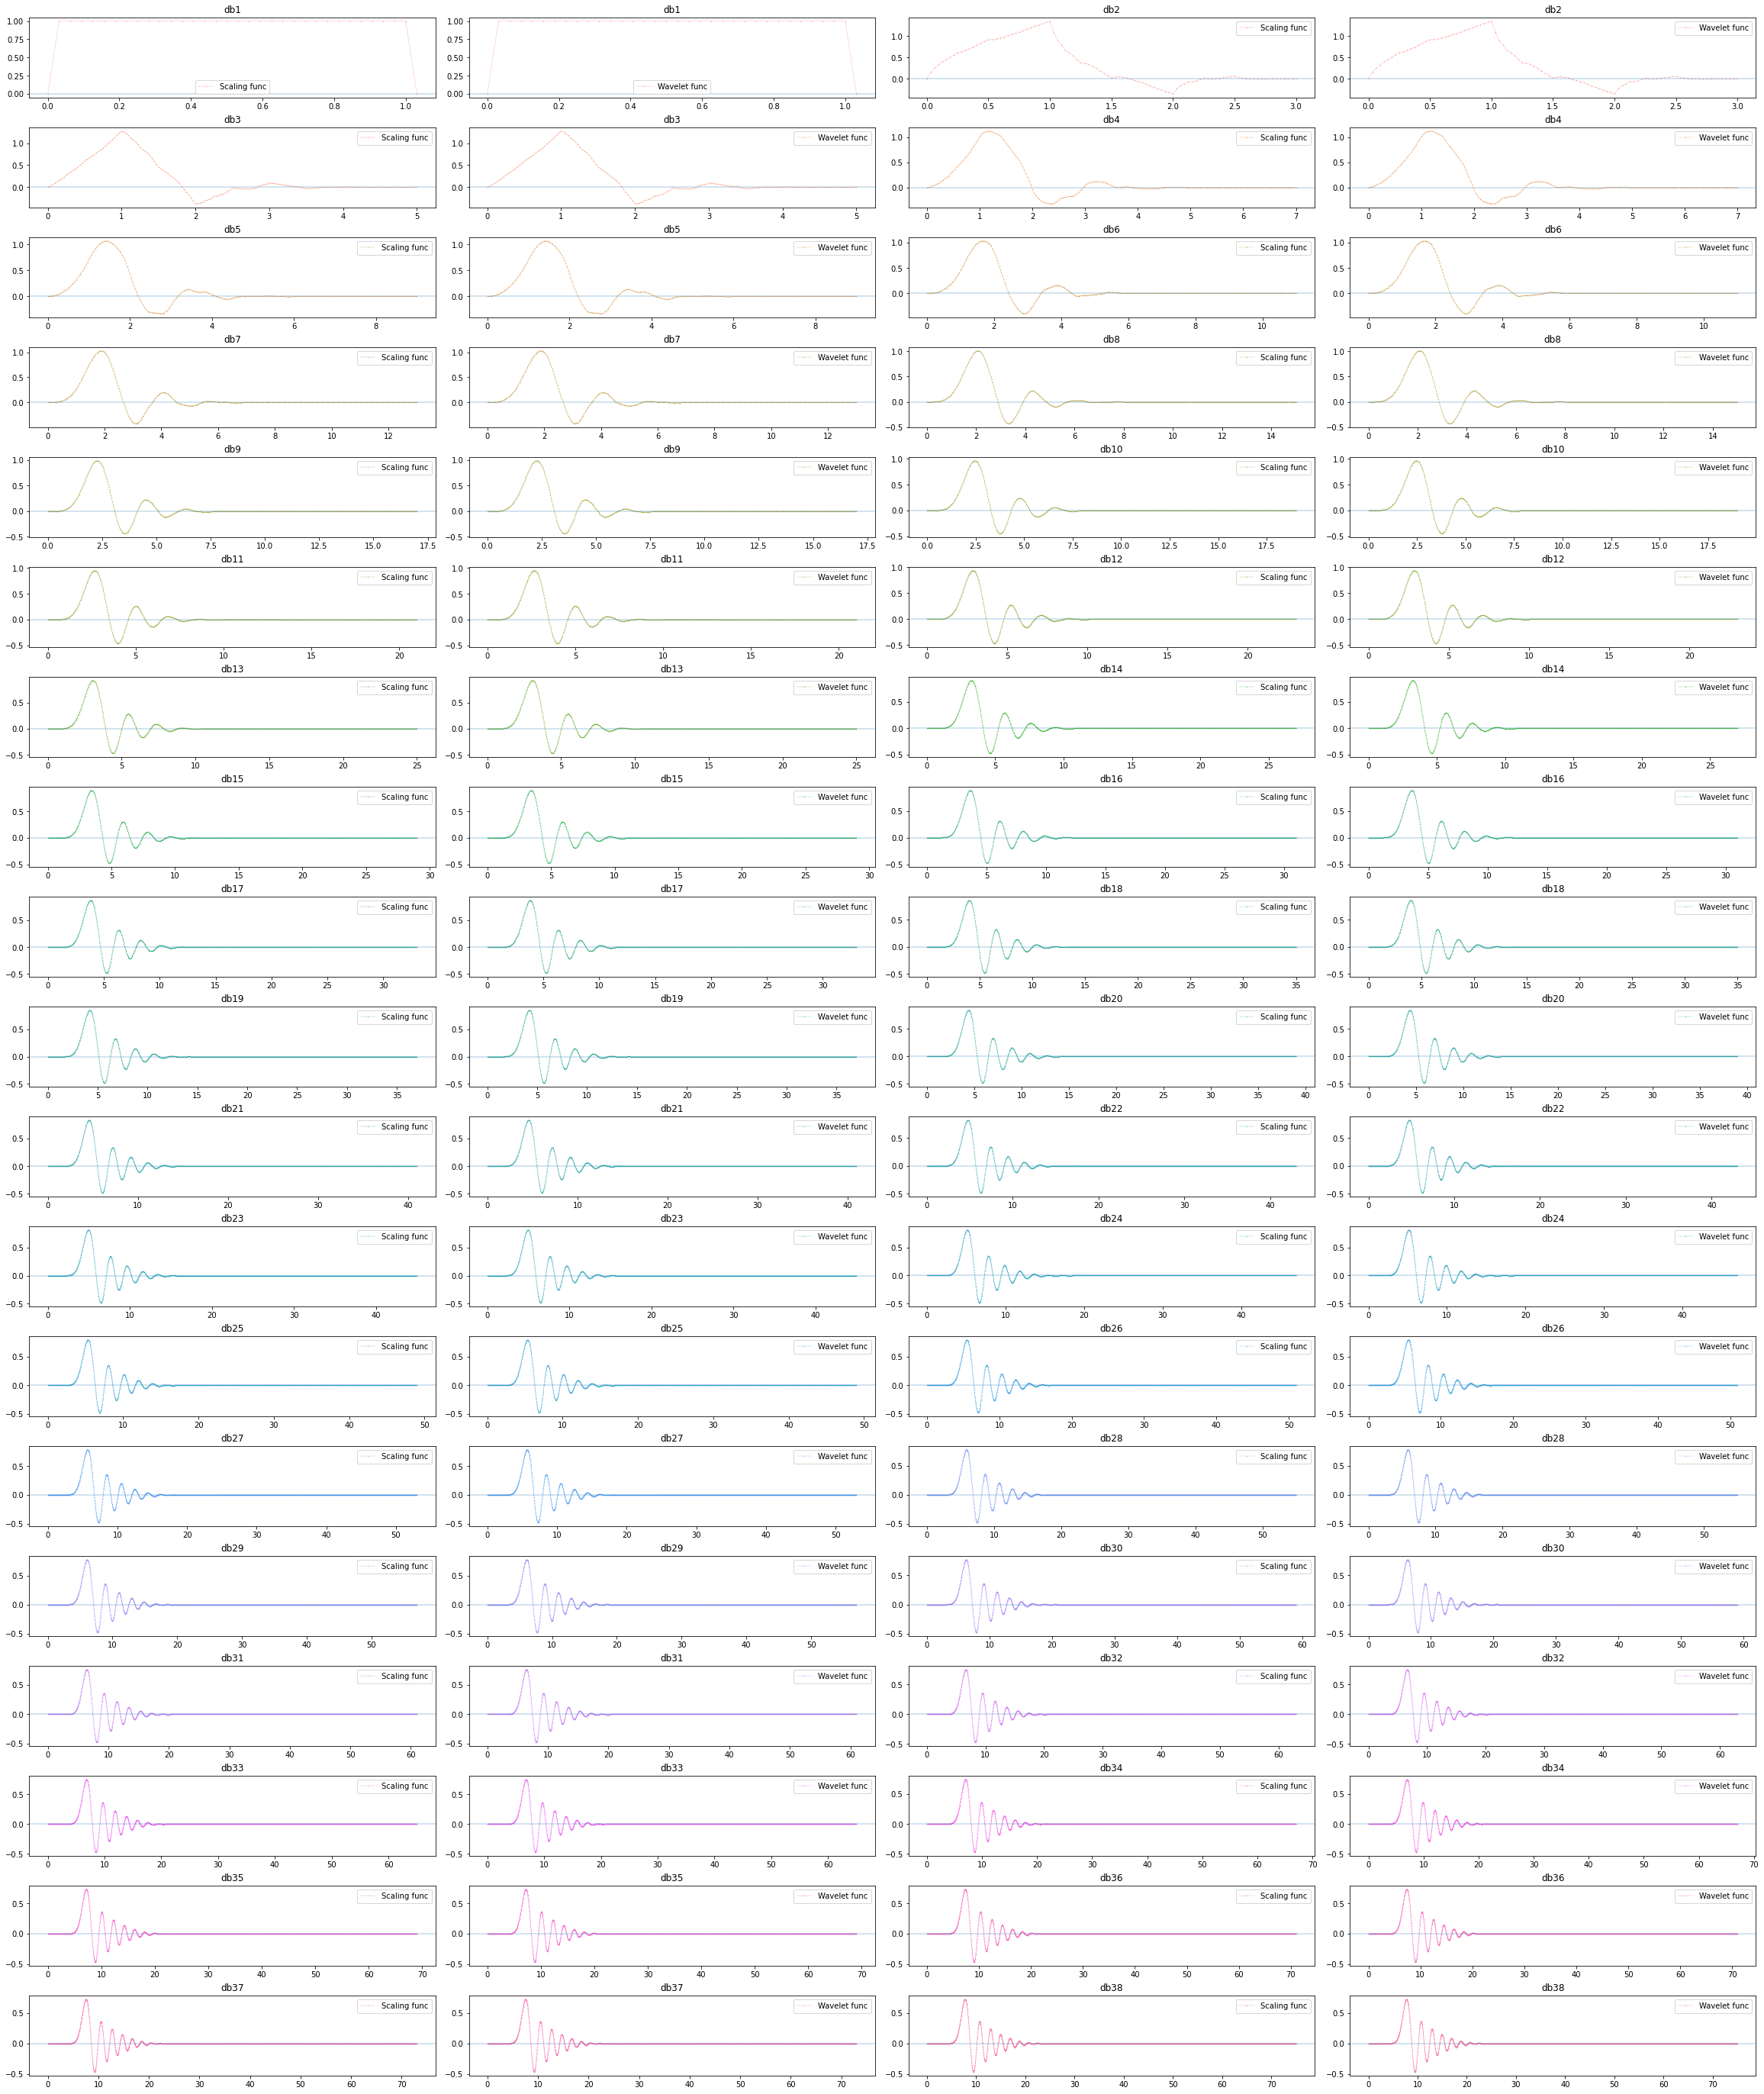

ic| l: 19
ic| n_col: 4, n_row: 10
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1
ic| r: 0, c: 1, r * n_func + c: 1, idx: 3
ic| r: 1, c: 0, r * n_func + c: 2, idx: 5
ic| r: 1, c: 1, r * n_func + c: 3, idx: 7
ic| r: 2, c: 0, r * n_func + c: 4, idx: 9
ic| r: 2, c: 1, r * n_func + c: 5, idx: 11
ic| r: 3, c: 0, r * n_func + c: 6, idx: 13
ic| r: 3, c: 1, r * n_func + c: 7, idx: 15
ic| r: 4, c: 0, r * n_func + c: 8, idx: 17
ic| r: 4, c: 1, r * n_func + c: 9, idx: 19
ic| r: 5, c: 0, r * n_func + c: 10, idx: 21
ic| r: 5, c: 1, r * n_func + c: 11, idx: 23
ic| r: 6, c: 0, r * n_func + c: 12, idx: 25
ic| r: 6, c: 1, r * n_func + c: 13, idx: 27
ic| r: 7, c: 0, r * n_func + c: 14, idx: 29
ic| r: 7, c: 1, r * n_func + c: 15, idx: 31
ic| r: 8, c: 0, r * n_func + c: 16, idx: 33
ic| r: 8, c: 1, r * n_func + c: 17, idx: 35
ic| r: 9, c: 0, r * n_func + c: 18, idx: 37


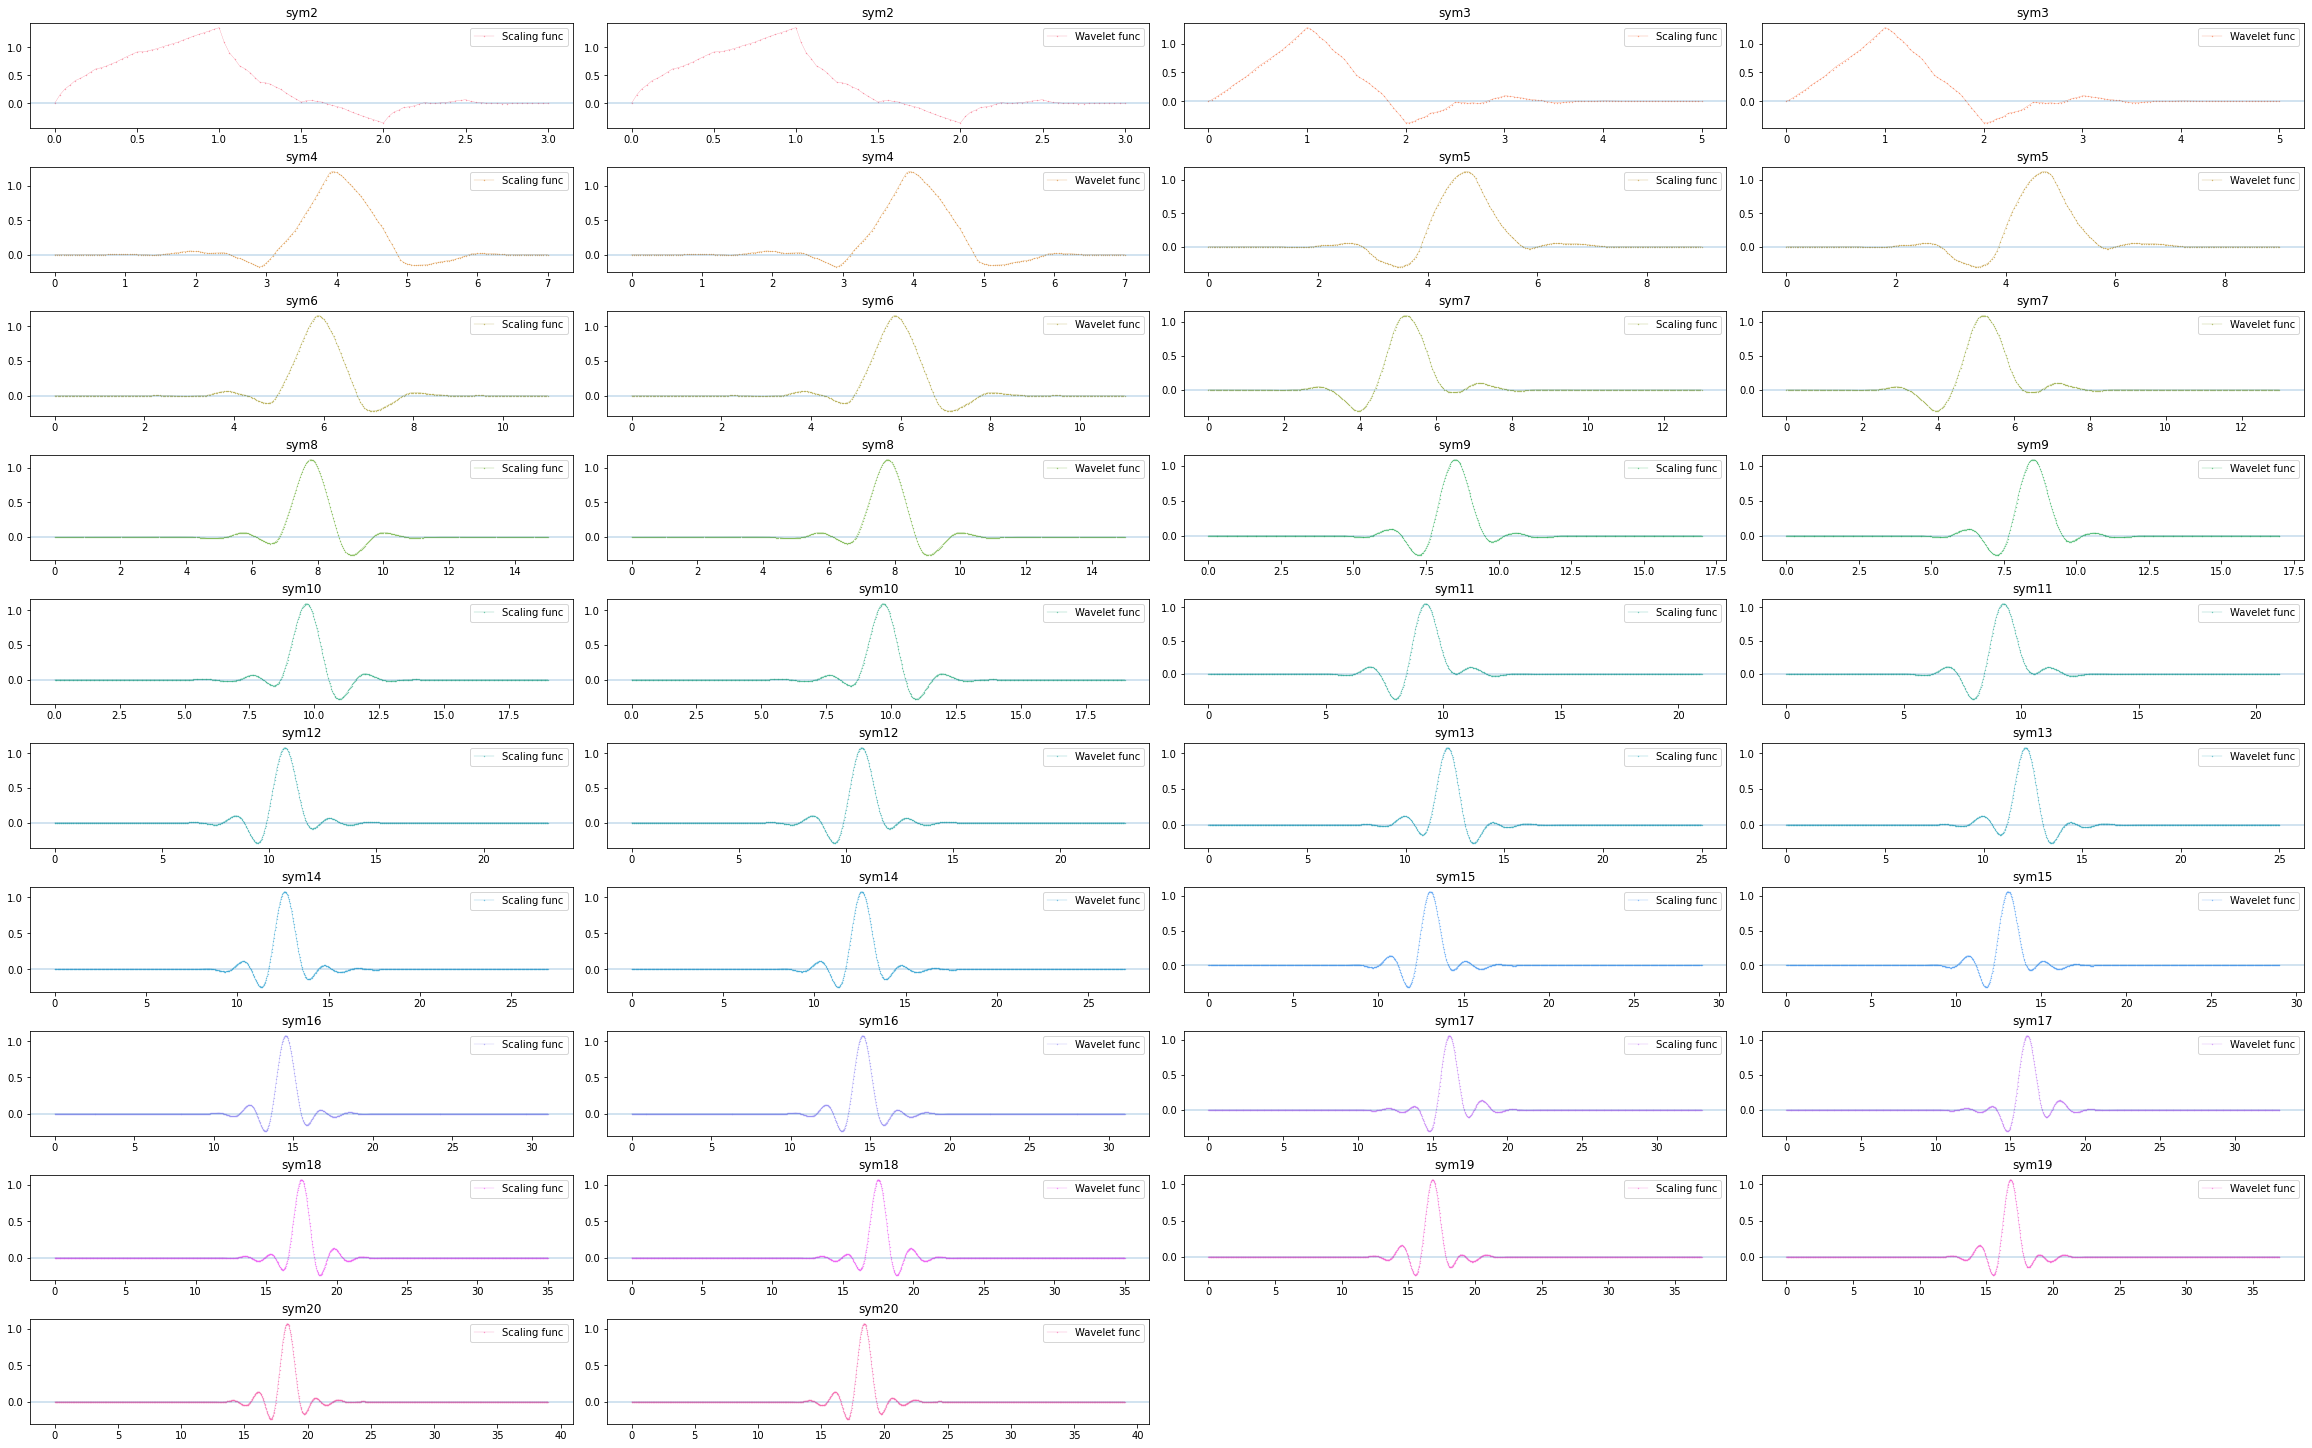

ic| l: 17
ic| n_col: 4, n_row: 9
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1
ic| r: 0, c: 1, r * n_func + c: 1, idx: 3
ic| r: 1, c: 0, r * n_func + c: 2, idx: 5
ic| r: 1, c: 1, r * n_func + c: 3, idx: 7
ic| r: 2, c: 0, r * n_func + c: 4, idx: 9
ic| r: 2, c: 1, r * n_func + c: 5, idx: 11
ic| r: 3, c: 0, r * n_func + c: 6, idx: 13
ic| r: 3, c: 1, r * n_func + c: 7, idx: 15
ic| r: 4, c: 0, r * n_func + c: 8, idx: 17
ic| r: 4, c: 1, r * n_func + c: 9, idx: 19
ic| r: 5, c: 0, r * n_func + c: 10, idx: 21
ic| r: 5, c: 1, r * n_func + c: 11, idx: 23
ic| r: 6, c: 0, r * n_func + c: 12, idx: 25
ic| r: 6, c: 1, r * n_func + c: 13, idx: 27
ic| r: 7, c: 0, r * n_func + c: 14, idx: 29
ic| r: 7, c: 1, r * n_func + c: 15, idx: 31
ic| r: 8, c: 0, r * n_func + c: 16, idx: 33


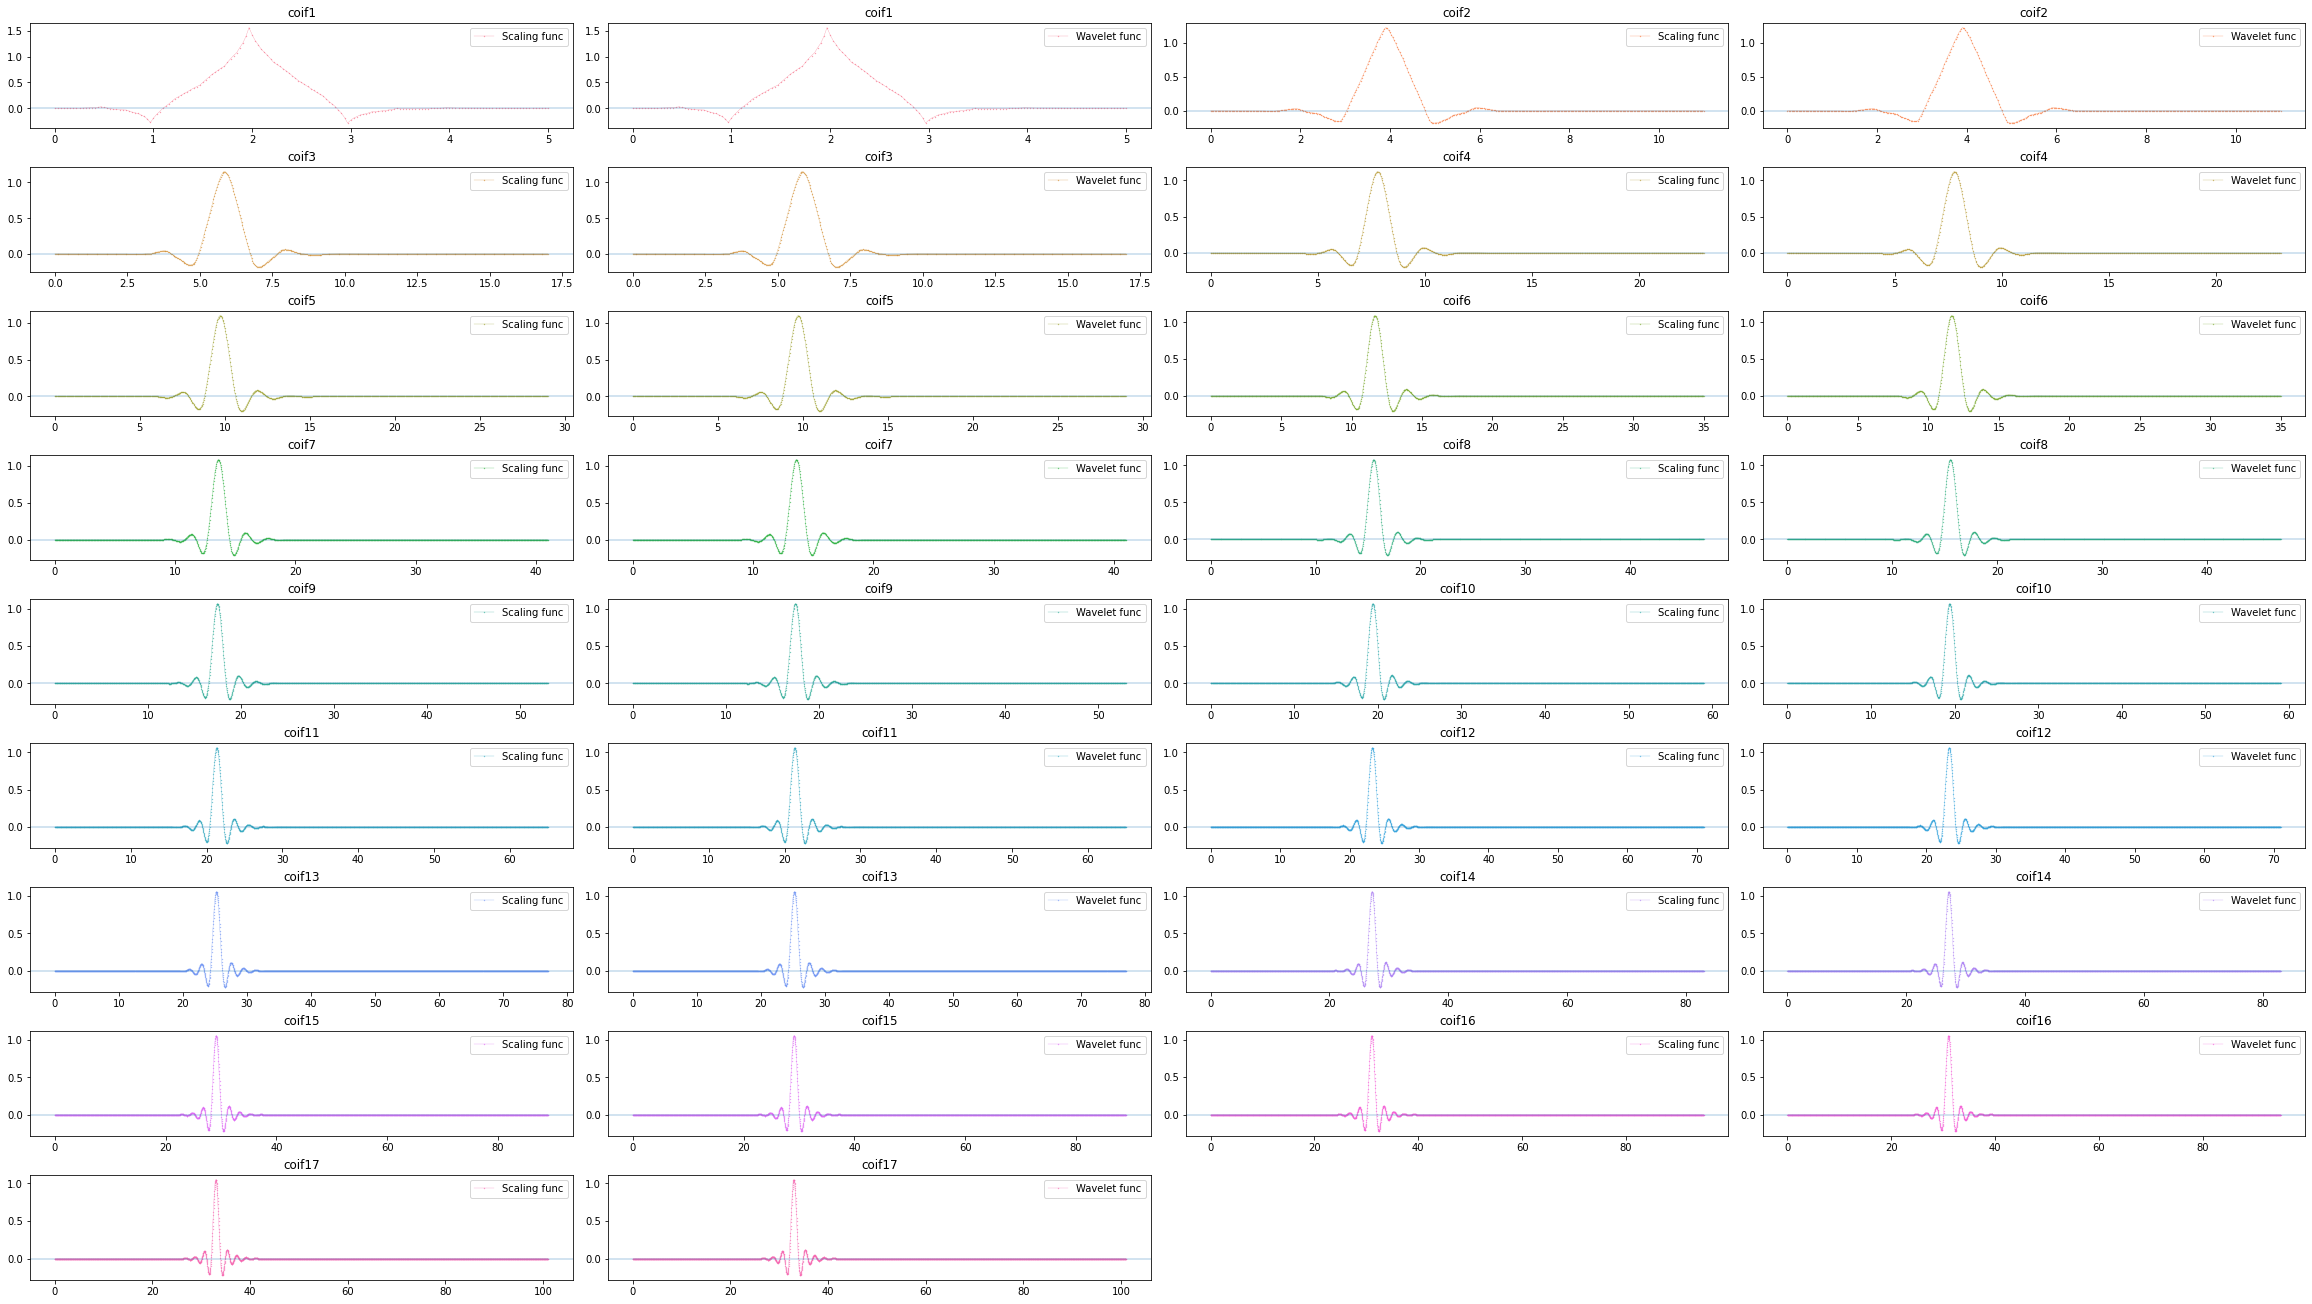

ic| l: 15
ic| n_col: 4, n_row: 15
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1
ic| r: 1, c: 0, r * n_func + c: 4, idx: 5
ic| r: 2, c: 0, r * n_func + c: 8, idx: 9
ic| r: 3, c: 0, r * n_func + c: 12, idx: 13
ic| r: 4, c: 0, r * n_func + c: 16, idx: 17
ic| r: 5, c: 0, r * n_func + c: 20, idx: 21
ic| r: 6, c: 0, r * n_func + c: 24, idx: 25
ic| r: 7, c: 0, r * n_func + c: 28, idx: 29
ic| r: 8, c: 0, r * n_func + c: 32, idx: 33
ic| r: 9, c: 0, r * n_func + c: 36, idx: 37
ic| r: 10, c: 0, r * n_func + c: 40, idx: 41
ic| r: 11, c: 0, r * n_func + c: 44, idx: 45
ic| r: 12, c: 0, r * n_func + c: 48, idx: 49
ic| r: 13, c: 0, r * n_func + c: 52, idx: 53
ic| r: 14, c: 0, r * n_func + c: 56, idx: 57


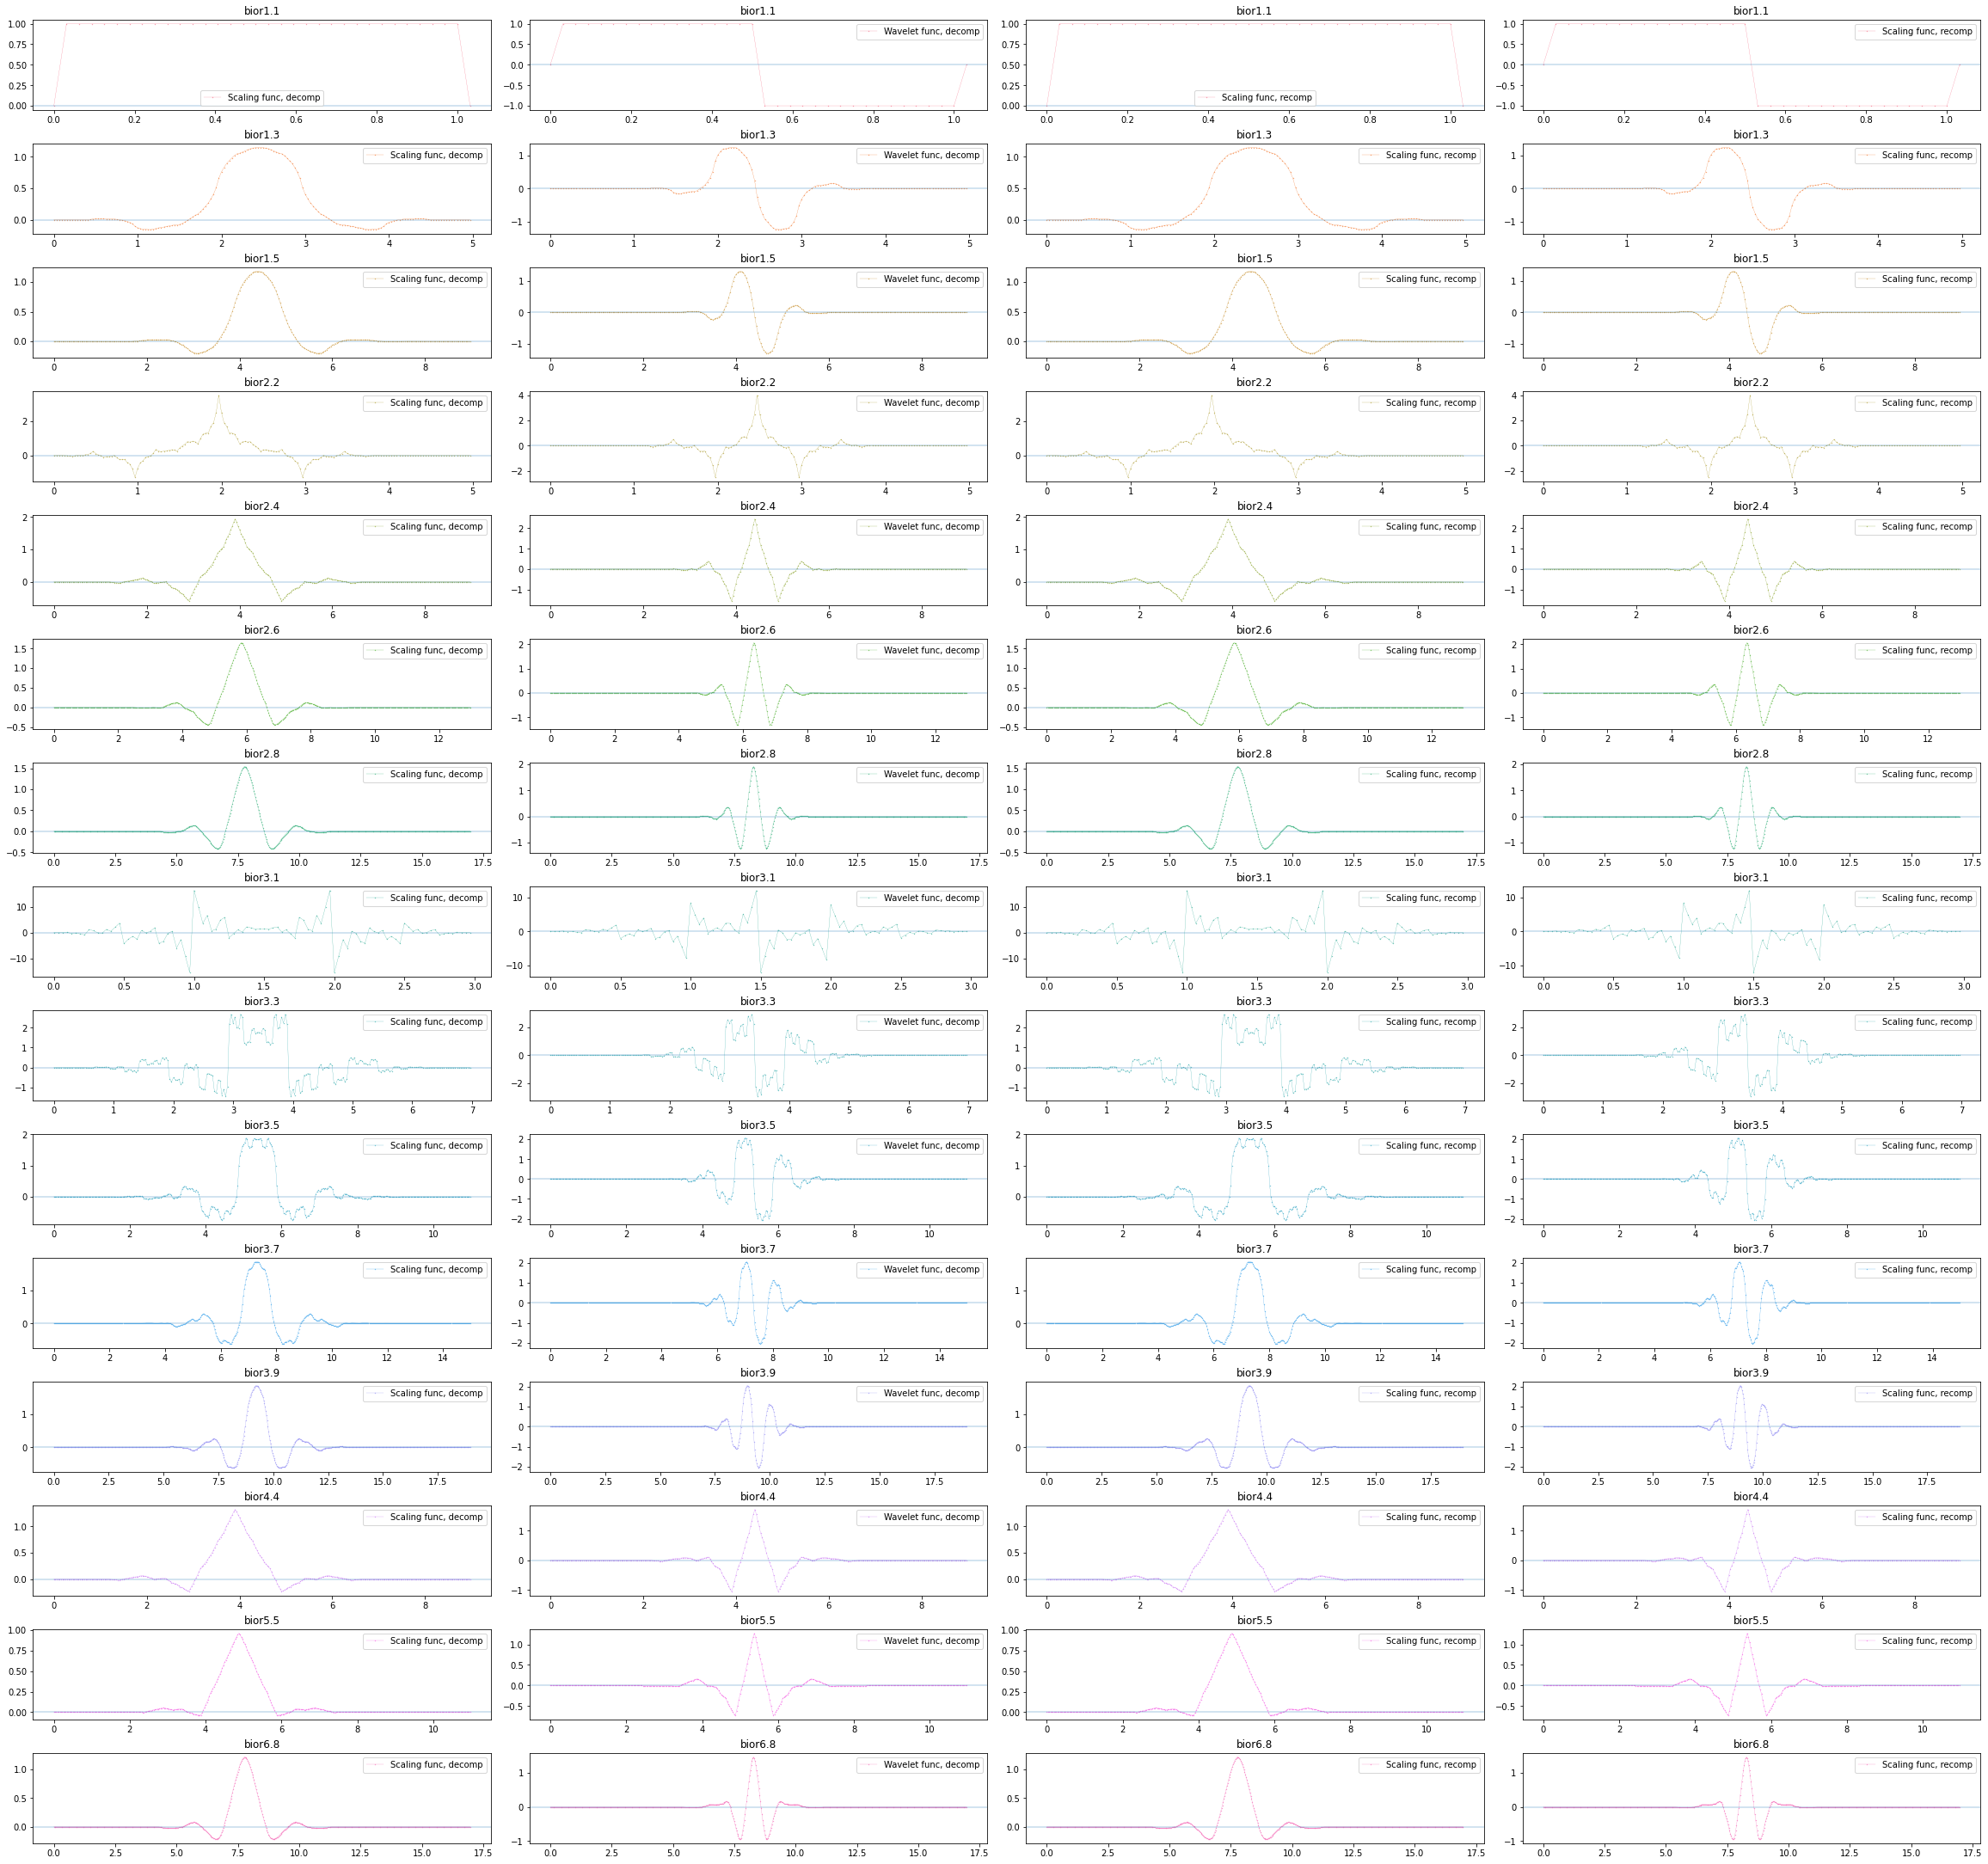

ic| l: 15
ic| n_col: 4, n_row: 15
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1
ic| r: 1, c: 0, r * n_func + c: 4, idx: 5
ic| r: 2, c: 0, r * n_func + c: 8, idx: 9
ic| r: 3, c: 0, r * n_func + c: 12, idx: 13
ic| r: 4, c: 0, r * n_func + c: 16, idx: 17
ic| r: 5, c: 0, r * n_func + c: 20, idx: 21
ic| r: 6, c: 0, r * n_func + c: 24, idx: 25
ic| r: 7, c: 0, r * n_func + c: 28, idx: 29
ic| r: 8, c: 0, r * n_func + c: 32, idx: 33
ic| r: 9, c: 0, r * n_func + c: 36, idx: 37
ic| r: 10, c: 0, r * n_func + c: 40, idx: 41
ic| r: 11, c: 0, r * n_func + c: 44, idx: 45
ic| r: 12, c: 0, r * n_func + c: 48, idx: 49
ic| r: 13, c: 0, r * n_func + c: 52, idx: 53
ic| r: 14, c: 0, r * n_func + c: 56, idx: 57


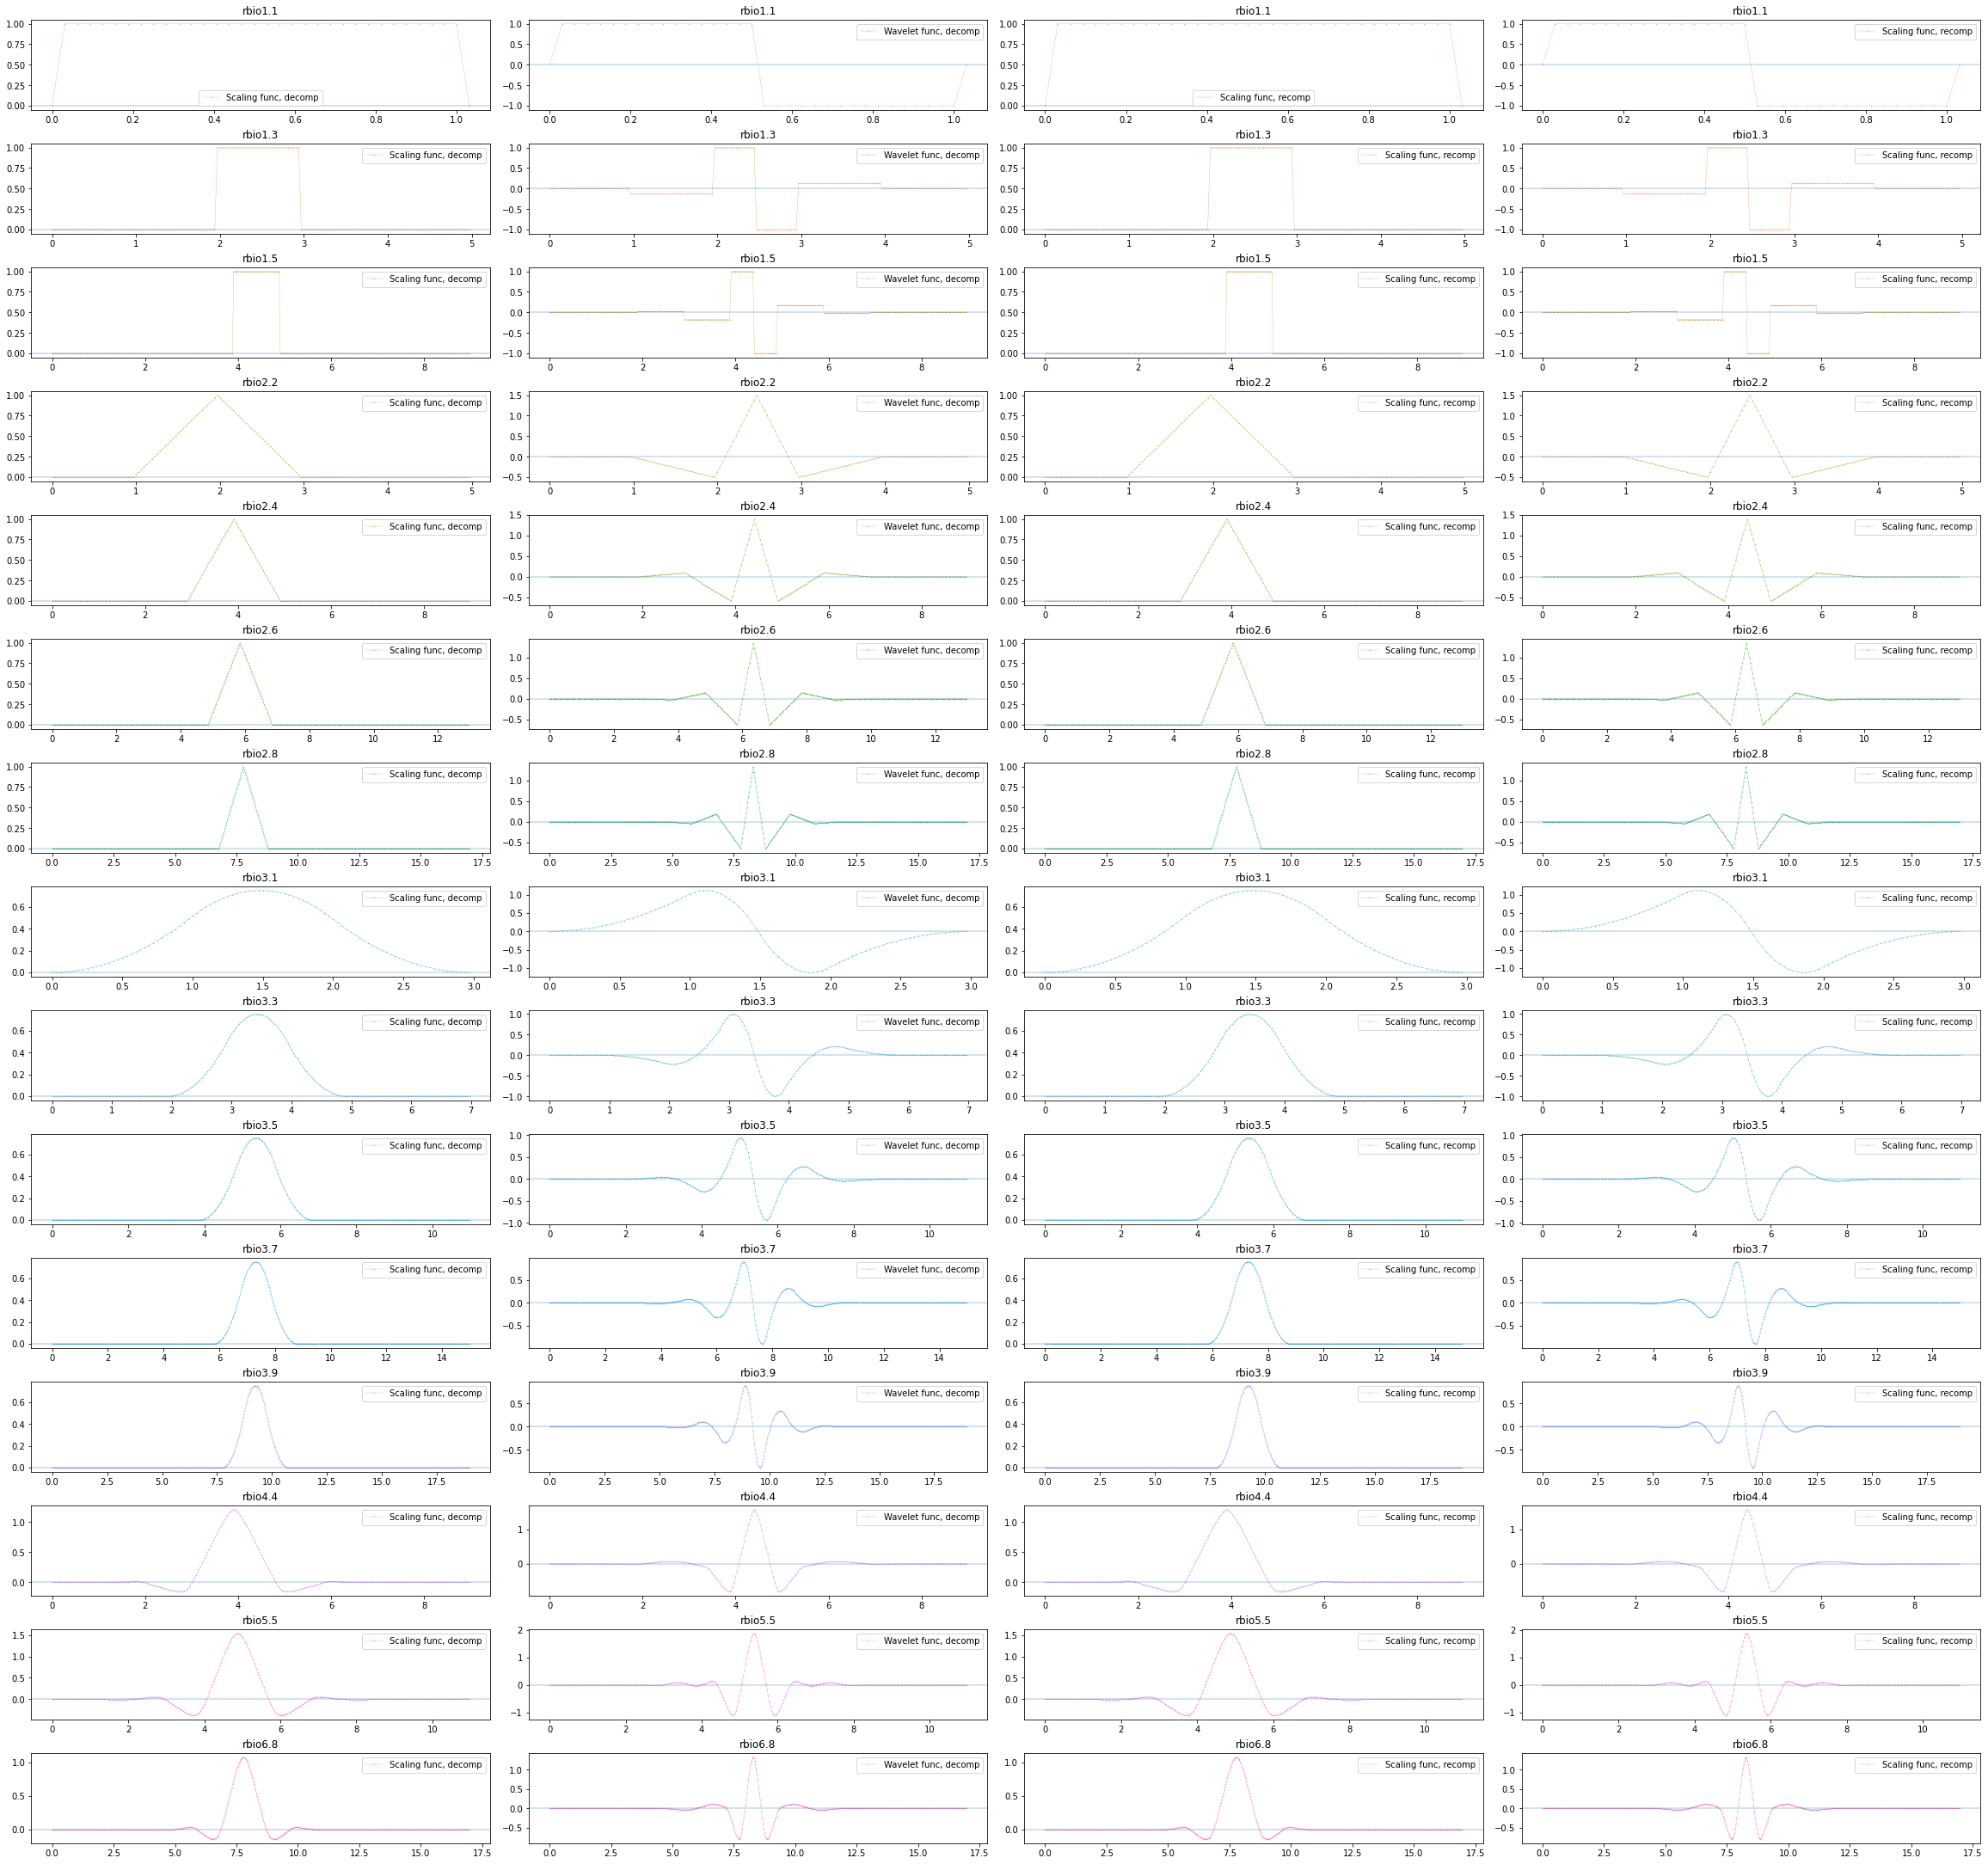

ic| l: 1
ic| n_col: 4, n_row: 1
ic| r: 0, c: 0, r * n_func + c: 0, idx: 1


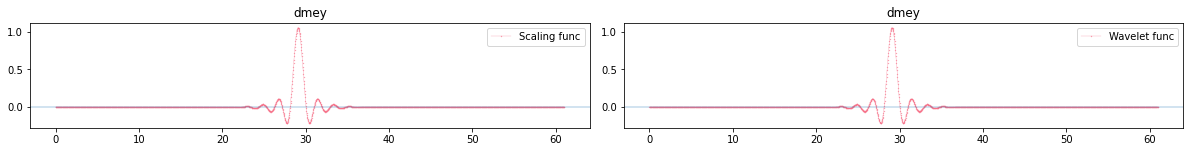

ValueError: The `Wavelet` class is for discrete wavelets, gaus1 is a continuous wavelet.  Use pywt.ContinuousWavelet instead

In [4]:
for f in pywt.families():
    plot_all_wavelets(f)

## ECG signal to wavelet coefficients

How come a signal can be decomposed into a *few* coefficients?

In [ ]:
def plot_wavelet_coeffs(arr, w, level=6, title=None):
    """Show multi-level dwt coefficients for given data and wavelet """
    # w = pywt.Wavelet(w)
    # a = data
    # ca = []
    # cd = []
    #
    # for i in range(5):
    #     (a, d) = pywt.dwt(a, w, mode='smooth')
    #     ca.append(a)
    #     cd.append(d)
    #
    # fig = plt.figure(figsize=(16, 9))
    # ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
    # ax_main.set_title(title)
    # ax_main.plot(data)
    # ax_main.set_xlim(0, len(data) - 1)
    #
    # for i, x in enumerate(ca):
    #     ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
    #     ax.plot(x, 'r')
    #     ax.set_ylabel("A%d" % (i + 1))
    #     ax.set_xlim(0, len(x) - 1)
    #
    # for i, x in enumerate(cd):
    #     ax = fig.add_subplot(len(cd) + 1, 2, 4 + i * 2)
    #     ax.plot(x, 'g')
    #     ax.set_ylabel("D%d" % (i + 1))
    #     # Scale axes
    #     ax.set_xlim(0, len(x) - 1)
    #     ax.set_ylim(min(0, 1.4 * min(x)), max(0, 1.4 * max(x)))
    coeffs = pywt.wavedec(arr, w, mode='smooth', level=level)
    appr, dtls = coeffs[0], coeffs[1:]



i = 502
data = ecgs[i][:350]
ic(data.shape)

plot_wavelet_coeffs(data, 'db2', 'sa')

plt.plot(data)
plt.show()

n = 0
for arr in pywt.wavedec(data, 'db2', level=6):
    plt.plot(arr)
    plt.show()
    n += arr.shape[0]
    ic(arr.shape)
ic(n)